In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import copy
import statsmodels.stats.api as sms
from scipy.stats import wilcoxon
sns.set(style="darkgrid")
import test_mod as mod

## Descriptive statistics of attributes in the Diagnosis spreadsheet.
### Importing data

In [3]:
diagnosis = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\diagnosis.csv")
diagnosis.head()

,id,perfor_status,has_concom,concom_name,T,N,M,figo,PT,tumor_size,growth_type,VI,PaR,PaL,UI,ct_abdomen,ct_pelvic,mri_pelvic
0,101,1.0,Т,В вирусны гепатит,2B,1.0,0.0,IIIC1,1.0,Д,1.0,0.0,IIB,IIB,Т,Т,Т,Ү
1,102,1.0,Ү,NaN,2B,1.0,0.0,IIIC1,1.0,Д,2.0,0.0,IIB,IIB,Ү,Т,Т,Т
2,103,1.0,Ү,NaN,2B,1.0,0.0,IIIC1,1.0,Д,2.0,0.0,IIB,IIB,Т,Т,Т,Ү
3,104,1.0,Ү,NaN,2B,1.0,0.0,IIIC1,1.0,Д,1.0,0.0,IIB,IIB,Ү,Т,Т,Т
4,105,1.0,Т,Артерийн даралт ихдэх,3B,1.0,0.0,IIIC1,1.0,Т,2.0,0.0,IIIB,IIB,Ү,Т,Т,Т


In [4]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             98 non-null     int64  
 1   perfor_status  84 non-null     float64
 2   has_concom     85 non-null     object 
 3   concom_name    32 non-null     object 
 4   T              85 non-null     object 
 5   N              85 non-null     float64
 6   M              84 non-null     float64
 7   figo           85 non-null     object 
 8   PT             85 non-null     float64
 9   tumor_size     85 non-null     object 
 10  growth_type    85 non-null     float64
 11  VI             85 non-null     float64
 12  PaR            85 non-null     object 
 13   PaL           85 non-null     object 
 14  UI             85 non-null     object 
 15  ct_abdomen     85 non-null     object 
 16  ct_pelvic      85 non-null     object 
 17  mri_pelvic     85 non-null     object 
dtypes: float64(6

In [5]:
brachytherapy = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\brachytherapy.csv")
brachytherapy.head()

,id,last_brachy_date,applicator_name,total_apoint_left,total_apoint_right,icru_rectum,icru_bladder,hrctv_volume,eqd2_bladder,eqd2_rectum,eqd2_sigmoid,eqd2_hrbrachy_dose,eqd2_total_dose
0,101,2020.01.16,LCT 42-8-2L,74.2,74.2,51.8,51.7,33.0,66.4,51.8,67.4,35.8,80.3
1,102,2019.12.03,LCT 42-8-3L,63.6,65.2,60.9,49.5,26.5,69.2,54.5,63.6,39.1,83.7
2,103,2020.01.16,LAR 01-01 D25,79.6,80.3,NaN,77.1,42.1,83.6,64.3,68.0,36.7,86.7
3,104,2020.01.15,LCT 42-8-2L,80.0,79.9,72.3,68.1,35.0,79.0,68.7,72.3,35.8,85.8
4,105,2019.03.04,LAR 04-01 D25,67.9,67.4,64.3,65.3,20.7,78.6,68.4,66.0,37.7,87.7


In [6]:
brachytherapy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  98 non-null     int64  
 1   last_brachy_date    85 non-null     object 
 2   applicator_name     85 non-null     object 
 3   total_apoint_left   80 non-null     float64
 4   total_apoint_right  80 non-null     float64
 5   icru_rectum         80 non-null     float64
 6   icru_bladder        83 non-null     float64
 7   hrctv_volume        85 non-null     float64
 8   eqd2_bladder        85 non-null     float64
 9   eqd2_rectum         85 non-null     float64
 10  eqd2_sigmoid        85 non-null     float64
 11  eqd2_hrbrachy_dose  85 non-null     float64
 12  eqd2_total_dose     85 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.1+ KB


In [7]:
df = diagnosis.merge(brachytherapy, on='id')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  98 non-null     int64  
 1   perfor_status       84 non-null     float64
 2   has_concom          85 non-null     object 
 3   concom_name         32 non-null     object 
 4   T                   85 non-null     object 
 5   N                   85 non-null     float64
 6   M                   84 non-null     float64
 7   figo                85 non-null     object 
 8   PT                  85 non-null     float64
 9   tumor_size          85 non-null     object 
 10  growth_type         85 non-null     float64
 11  VI                  85 non-null     float64
 12  PaR                 85 non-null     object 
 13   PaL                85 non-null     object 
 14  UI                  85 non-null     object 
 15  ct_abdomen          85 non-null     object 
 16  ct_pelvic 

### Exploratory data analysis

In [8]:
#Transforming data data
primary_var_name = 'UI'
secondary_var_name = 'eqd2_total_dose'

primary_vs_secondary = df[[primary_var_name,secondary_var_name]].copy()
primary_vs_secondary.dropna(inplace=True)
primary_vs_secondary[primary_var_name] = primary_vs_secondary[primary_var_name].astype('category')
primary_var = df[primary_var_name].copy()
primary_var.dropna(inplace=True)
primary_var_value_counts = primary_var.value_counts()

In [9]:
primary_var.head()

0    Т
1    Ү
2    Т
3    Ү
4    Ү
Name: UI, dtype: object

In [10]:
print("The frequency distribution of categories in {}.".format(primary_var_name))
print("In total, there are {} categories.".format(primary_var.value_counts().count()))
primary_var.value_counts()

The frequency distribution of categories in UI.
In total, there are 2 categories.


Ү    57
Т    28
Name: UI, dtype: int64

<AxesSubplot:xlabel='eqd2_total_dose', ylabel='UI'>

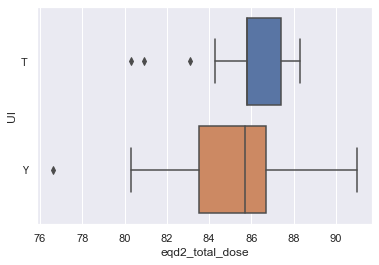

In [11]:
sns.boxplot(data=primary_vs_secondary,x=secondary_var_name, y=primary_var_name)


Let's graph the frequency distribution of the categorical features to a barplot.

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


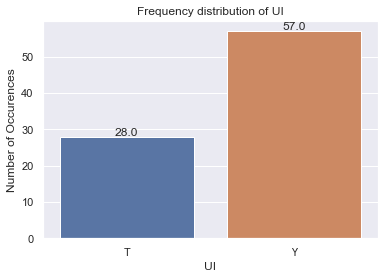

In [12]:
#Making a barplot
plot = sns.countplot(primary_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format(primary_var_name))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format(primary_var_name),fontsize=12)
plt.show()

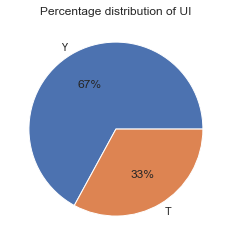

In [15]:
#Making a pie chart
plt.title("Percentage distribution of {}".format(primary_var_name))
plt.pie(primary_var_value_counts, labels=primary_var_value_counts.index, autopct='%.0f%%')
plt.show()